In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


X shape: (60000, 28, 28)  - type: uint8
y shape: (60000,)  - type: uint8


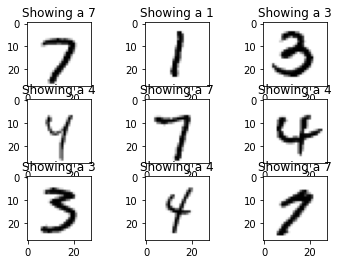

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print('X shape: ' + repr(X_train_full.shape) , ' - type: ' + str(X_train_full.dtype))
print('y shape: ' + repr(y_train_full.shape) , ' - type: ' + str(X_train_full.dtype))

tmpidxs = np.random.permutation( X_train_full.shape[0] )[:9]

plt.clf()
for i in range(9):
    plt.subplot(3,3,i+1)
    tmp_idx = tmpidxs[i]
    plt.imshow(X_train_full[tmp_idx,:,:], cmap='gray_r')
    plt.title('Showing a ' + str( y_train_full[tmp_idx] ) )
plt.show()

In [ ]:
# also readjust range to float 0-1 for gradient descend training

X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# why are the parameters 7850?

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


dense_1
(784, 10)
(10,)


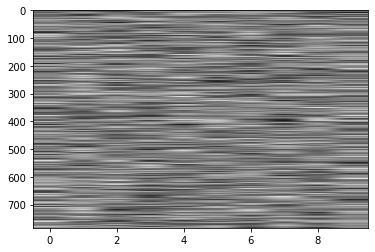

In [ ]:
hidden1 = model.layers[1]
print(hidden1.name)

# access weights and biases
weights, biases = hidden1.get_weights()
print(repr(weights.shape))
print(repr(biases.shape))

plt.clf()
plt.imshow(weights, cmap='gray_r', aspect='auto')
plt.show()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8087 - accuracy: 0.8082 - val_loss: 0.4947 - val_accuracy: 0.8794
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4683 - accuracy: 0.8777 - val_loss: 0.4064 - val_accuracy: 0.8942
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8891 - val_loss: 0.3701 - val_accuracy: 0.8992
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8949 - val_loss: 0.3501 - val_accuracy: 0.9030
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3671 - accuracy: 0.8984 - val_loss: 0.3361 - val_accuracy: 0.9072
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.9016 - val_loss: 0.3262 - val_accuracy: 0.9094
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3452 - accuracy: 0.9041 - val_loss: 0.3190 - val_accuracy:

dense_1
(784, 10)
(10,)


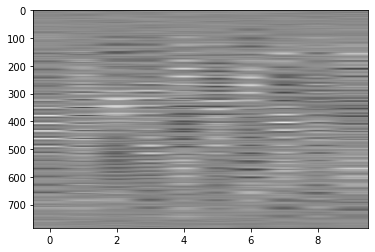

In [ ]:
hidden1 = model.layers[1]
print(hidden1.name)

# access weights and biases
weights, biases = hidden1.get_weights()
print(repr(weights.shape))
print(repr(biases.shape))

plt.clf()
plt.imshow(weights, cmap='gray_r', aspect='auto')
plt.show()

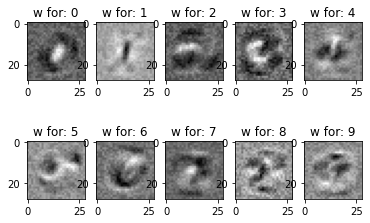

In [ ]:
# let's see the weights for each neuron
plt.clf()
for i in range(weights.shape[1]):
    plt.subplot(2,5,i+1)
    plt.imshow( np.reshape(weights[:,i], (28,28)) , cmap='gray_r' )
    plt.title( 'w for: ' + str(i) )
plt.show()

In [ ]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.3095 - accuracy: 0.9157


[0.30948406457901, 0.9157000184059143]

[[2.3416360e-03 1.1719239e-04 4.0959948e-01 5.8887387e-03 7.3680654e-02
  1.0083614e-04 2.1880006e-03 4.9173232e-02 2.0375222e-03 4.5487273e-01]]


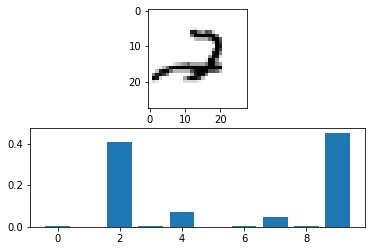

In [ ]:
# make predictions
tmpidxs = np.random.permutation( X_test.shape[0] )

tmp_idx = tmpidxs[i]
pred = model.predict( X_test[tmp_idx:tmp_idx+1,:,:] )
print(pred)

plt.clf()
plt.subplot(2,1,1)
plt.imshow(X_test[tmp_idx,:,:], cmap='gray_r')
plt.subplot(2,1,2)
plt.bar( np.arange(10) , pred[0] )
plt.show()